In [1]:
# !pip3 freeze > requirements.txt

In [2]:
# !pip install seaborn sentence_transformers nltk

In [3]:
import pandas as pd
import datetime as datetime
import numpy as np
import seaborn as sns
from sentence_transformers import SentenceTransformer
import nltk
import re
from sklearn.decomposition import PCA
nltk.download('punkt')

KeyboardInterrupt: 

In [ ]:
imdb = pd.read_parquet('../data/raw/imdb_reviews/cleaned_sorta.parquet')
imdb['scrape_date'] = [datetime.date(2023, 10, 21) for i in range(len(imdb))]
imdb['is_rotten'] = [np.nan for i in range(len(imdb))]
imdb['source'] = ['imdb' for i in range(len(imdb))]
imdb.score = imdb.score.apply(lambda x: x/10)




rt_aud = pd.read_csv('../data/raw/reviews/RT_audience.csv')
rt_aud['scrape_date'] = [datetime.date(2023, 10, 21) for i in range(len(rt_aud))]
rt_aud['title'] = [np.nan for i in range(len(rt_aud))]
rt_aud['is_rotten'] = [np.nan for i in range(len(rt_aud))]
rt_aud['source'] = ['rt_aud' for i in range(len(rt_aud))]




rt_crit = pd.read_csv('../data/raw/reviews/RT_critics.csv')
rt_crit['scrape_date'] = [datetime.date(2023, 10, 21) for i in range(len(rt_crit))]
rt_crit['title'] = [np.nan for i in range(len(rt_crit))]
rt_crit['score'] = [np.nan for i in range(len(rt_crit))]
rt_crit['source'] = ['rt_crit' for i in range(len(rt_crit))]





metacritic = pd.read_json('../data/raw/reviews/metacritic.json')
metacritic['title'] = [np.nan for i in range(len(metacritic))]
metacritic['is_rotten'] = [np.nan for i in range(len(metacritic))]
metacritic['source'] = ['metacritic' for i in range(len(metacritic))]



In [ ]:
df_list = [imdb, rt_aud, rt_crit, metacritic]
for i in df_list:
    print(sorted(i.columns))

['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']
['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']
['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']
['date', 'is_rotten', 'movie', 'score', 'scrape_date', 'source', 'text', 'title', 'url', 'user']


In [ ]:
str1 = 'spiderman-balls'.replace('spiderman', 'spider-man')

str1

'spider-man-balls'

In [ ]:
main_df = pd.concat(df_list)
print(len(main_df) - len(main_df.drop_duplicates()))
main_df = main_df.drop_duplicates()
main_df.loc[main_df['score'] == 0.0, ['score']]  = 1.0
def spiderman_fix(movie):
    if movie.startswith('spiderman'):
        return movie.replace('spiderman', 'spider-man')
    else:
        return movie
def guardians_fix(x):
    if 'vol-' in x:
        return x.replace('vol-', 'vol.-')
    else:
        return x

main_df.movie = main_df.movie.apply(lambda x: spiderman_fix(x))
main_df.movie = main_df.movie.apply(lambda x: guardians_fix(x))
main_df.reset_index(inplace=True)

265


In [ ]:
main_df.score.value_counts()

score
10.0    119907
8.0      61449
9.0      43976
7.0      39072
6.0      31970
1.0      18446
5.0      17439
4.0      15751
2.0      11211
3.0       9614
Name: count, dtype: int64

In [ ]:
scores = []
for film in set(main_df.movie):
    new_df = main_df.query('movie == @film')
    scores.append([film, new_df.score.median(), new_df.score.mean()])
    # print('median score:', new_df.score.median())
    # print('mean score:', new_df.score.mean())

median score: 10.0
mean score: 8.948364554013395
median score: 8.0
mean score: 7.246566488931976
median score: 8.0
mean score: 7.939027255639098
median score: 8.0
mean score: 7.009093619558736
median score: 8.0
mean score: 7.915132523828176
median score: 10.0
mean score: 8.396367072658547
median score: 6.0
mean score: 5.433469726006112
median score: 9.0
mean score: 8.16563846868926
median score: 8.0
mean score: 7.68608301360307
median score: 8.0
mean score: 7.821020384116885
median score: 9.0
mean score: 7.865174129353234
median score: 10.0
mean score: 8.315609167671894
median score: 8.0
mean score: 7.215885947046843
median score: 9.0
mean score: 8.527524068131326
median score: 9.0
mean score: 8.57
median score: 8.0
mean score: 7.900289397526967
median score: 6.0
mean score: 5.772693173293323
median score: 10.0
mean score: 8.647871116225547
median score: 8.0
mean score: 7.090277196214722
median score: 9.0
mean score: 7.854945054945055
median score: 10.0
mean score: 8.692777722127618
me

/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_41861/2165002354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scores.Mean_score, bins=20)


<Axes: xlabel='Mean_score', ylabel='Density'>

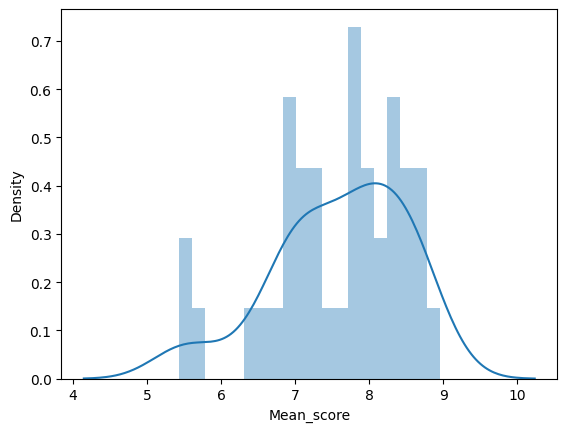

In [ ]:
scores = pd.DataFrame(data=scores, columns=['Movie', 'Median_Score', 'Mean_score'])
sns.distplot(scores.Mean_score, bins=20)

<Axes: >

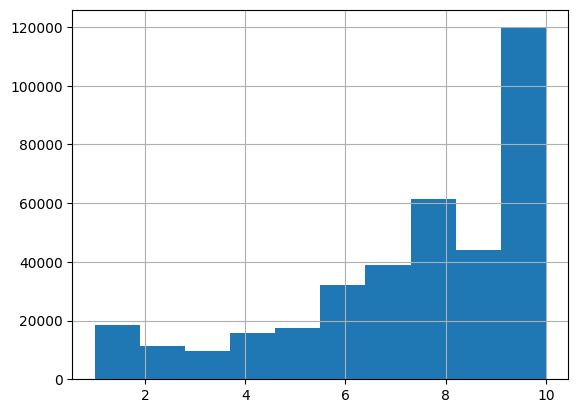

In [ ]:
main_df.score.hist(bins=10)

<Axes: >

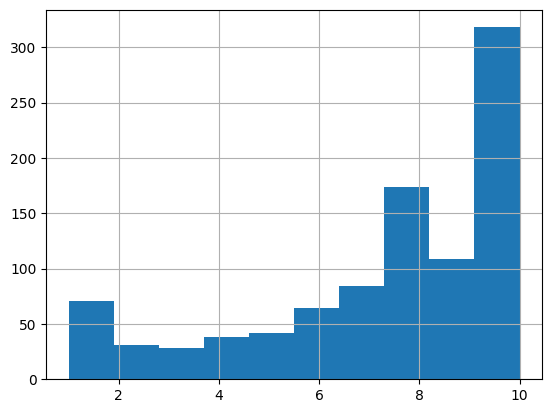

In [ ]:
main_df.sample(n=1000).score.hist(bins=10)

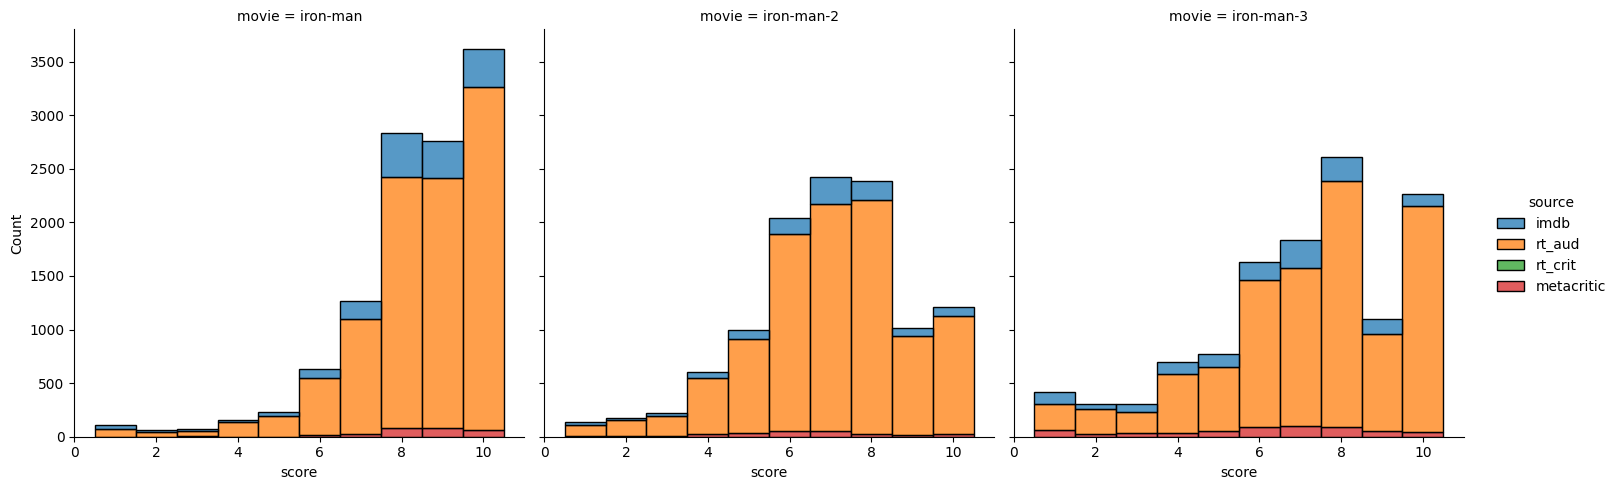

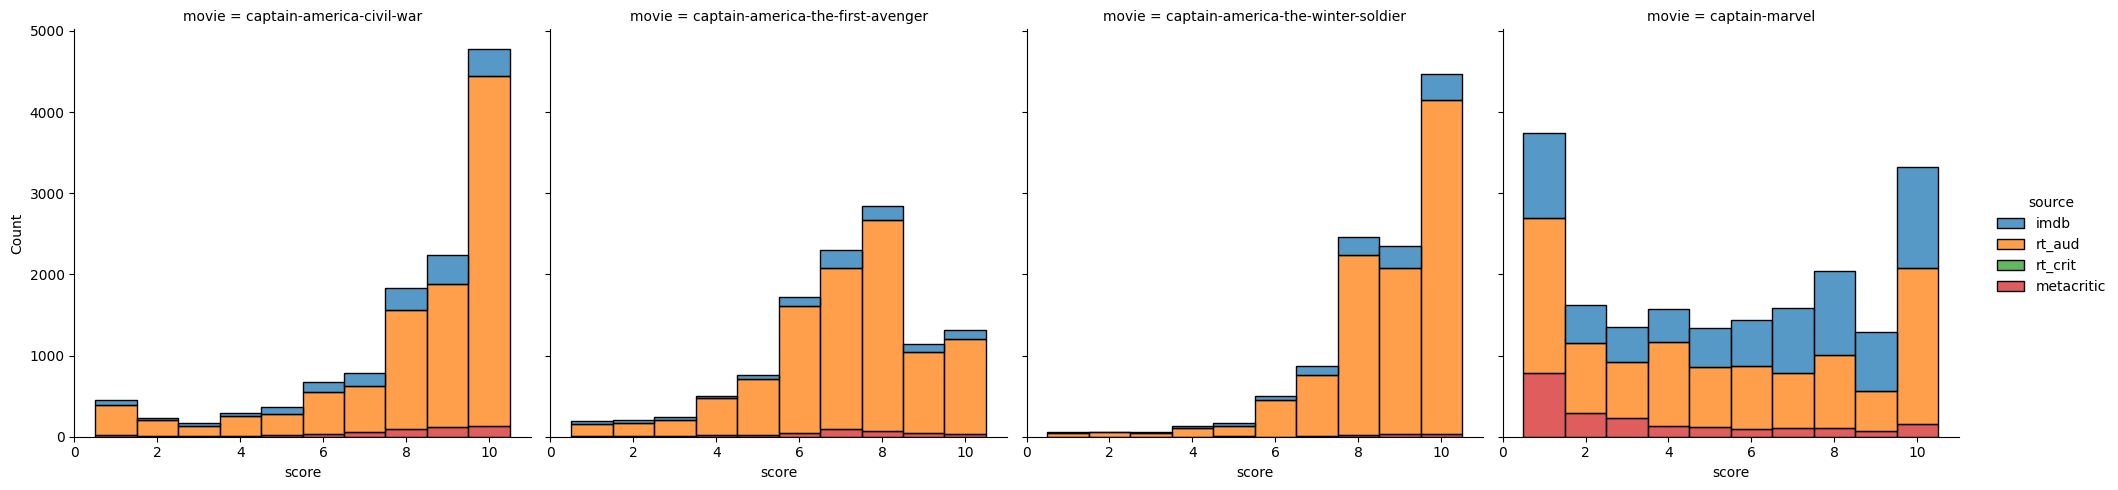

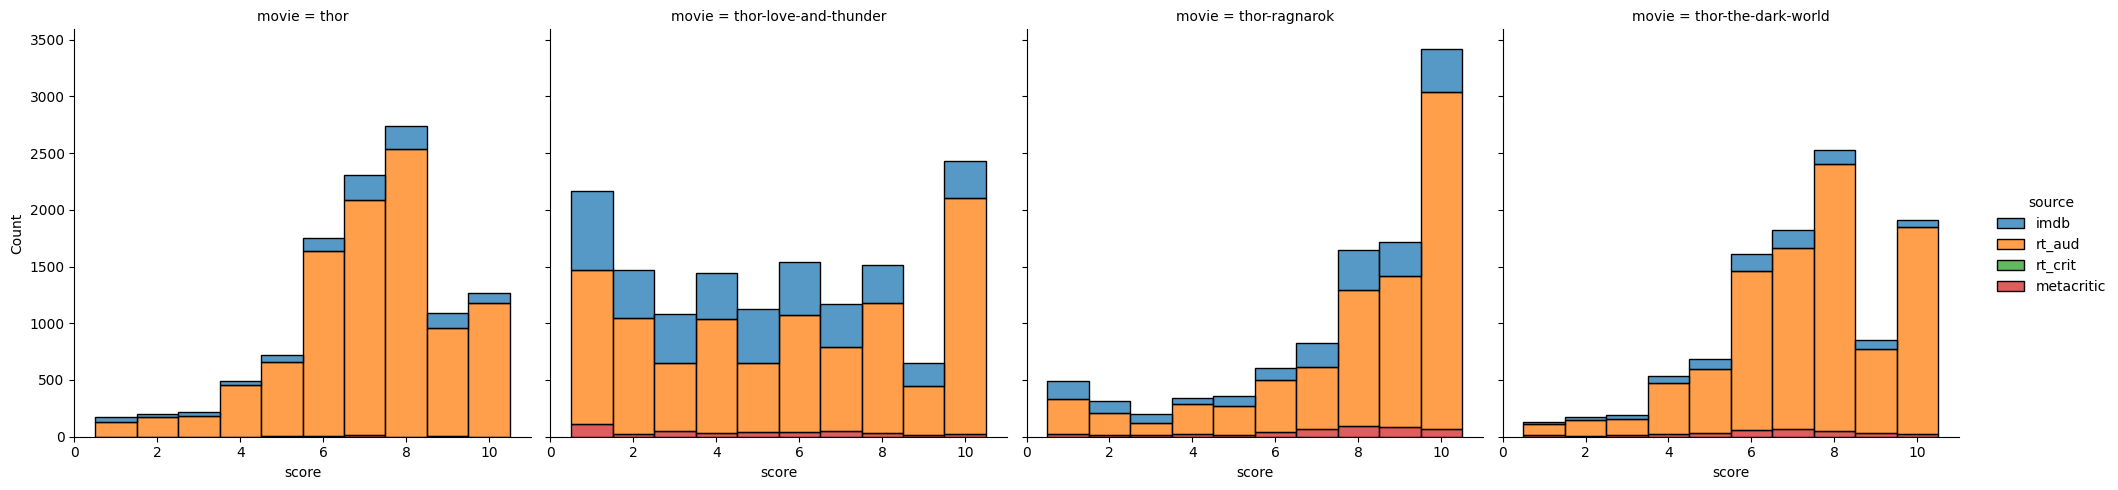

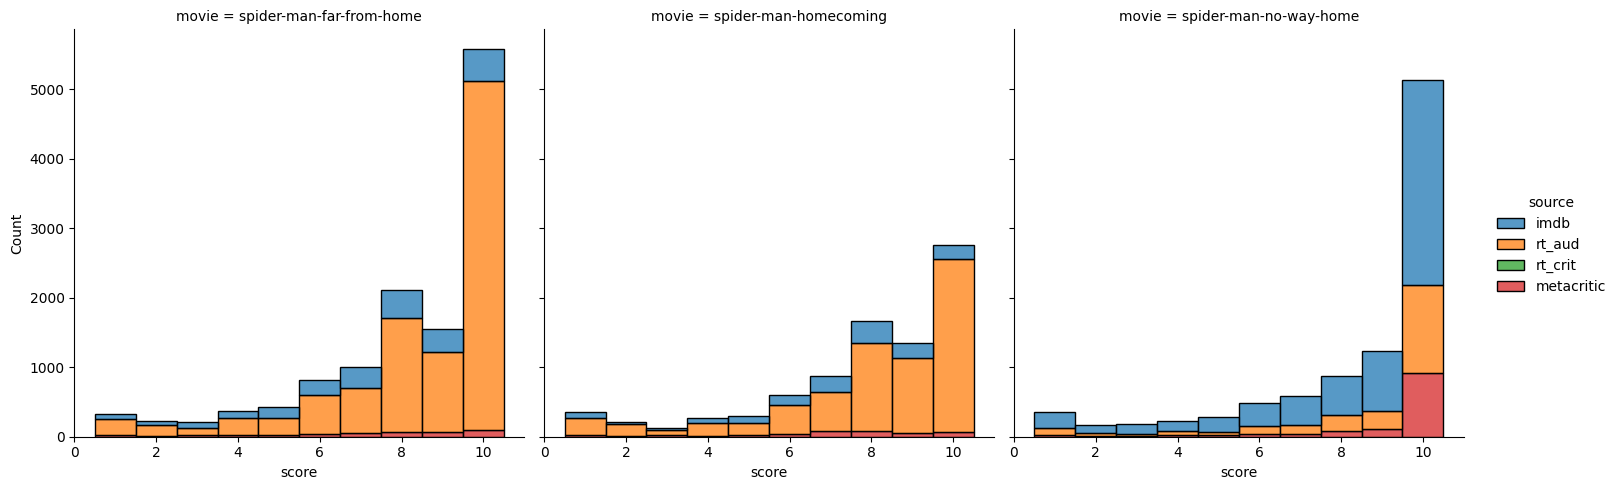

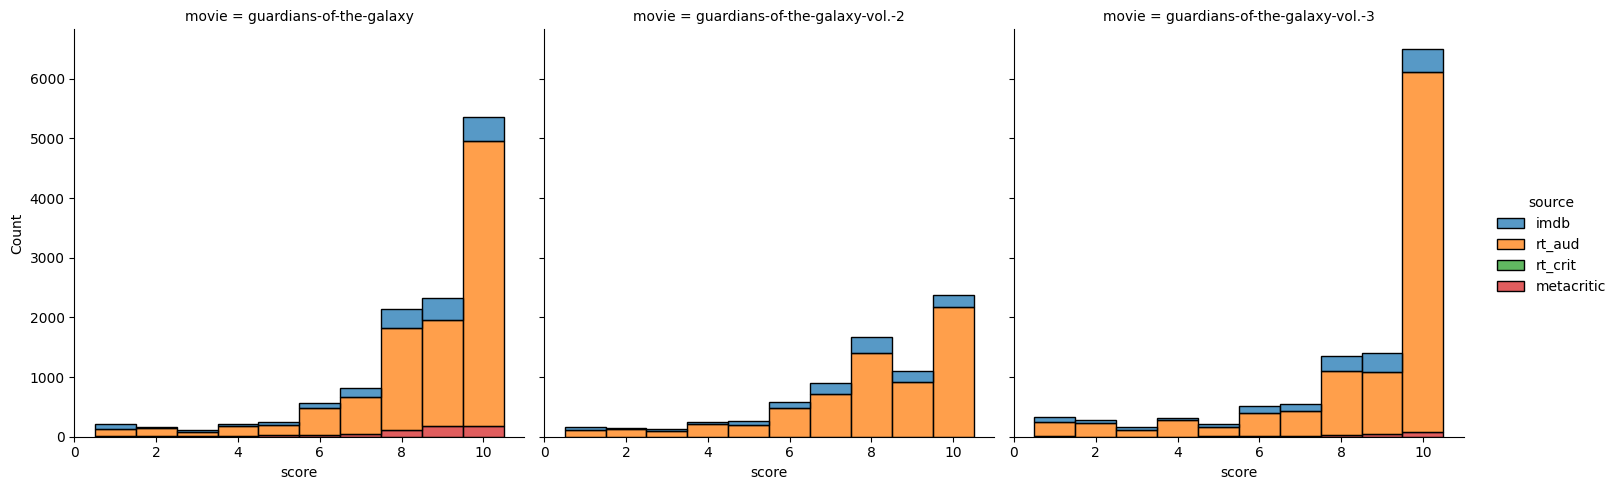

In [ ]:
def map_franchise(franchise, df):
    cap = df[df['movie'].str.startswith(franchise)]
    sns.displot(data= cap, x='score', col='movie', bins=10, fill=True, discrete=True, hue='source', multiple = 'stack')
map_franchise('iron-man', main_df)
map_franchise('captain', main_df)
map_franchise('thor', main_df)
map_franchise('spider', main_df)
map_franchise('guardians', main_df)




In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
main_df['text_cleaned'] = main_df.text.dropna()
main_df['text_cleaned'] = main_df.text_cleaned.astype(str)
main_df['text_cleaned'] = main_df.text_cleaned.str.lower()
main_df.text_cleaned = main_df.text_cleaned.apply(lambda s: re.sub(r"[0-9]", "number", s))
sample_data = main_df.sample(n=5000)
embeddings = sbert_model.encode(list(sample_data.text_cleaned))

In [ ]:
pca = PCA(n_components=2)
new_2d = pca.fit_transform(embeddings)
x, y = [], []
for i, j in new_2d:
    x.append(i)
    y.append(j)
sample_data['x'], sample_data['y'] = x, y

<Axes: xlabel='x', ylabel='y'>

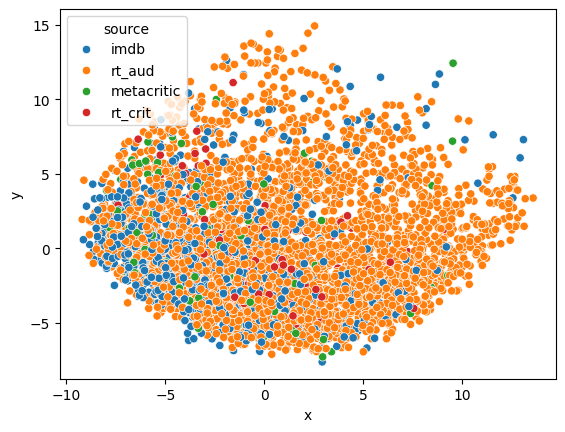

In [ ]:
sns.scatterplot(data=sample_data, x='x', y='y', hue='source')

In [ ]:
pca = PCA(n_components=1)
new_1d = pca.fit_transform(embeddings)
sample_data['1dim'] = new_1d

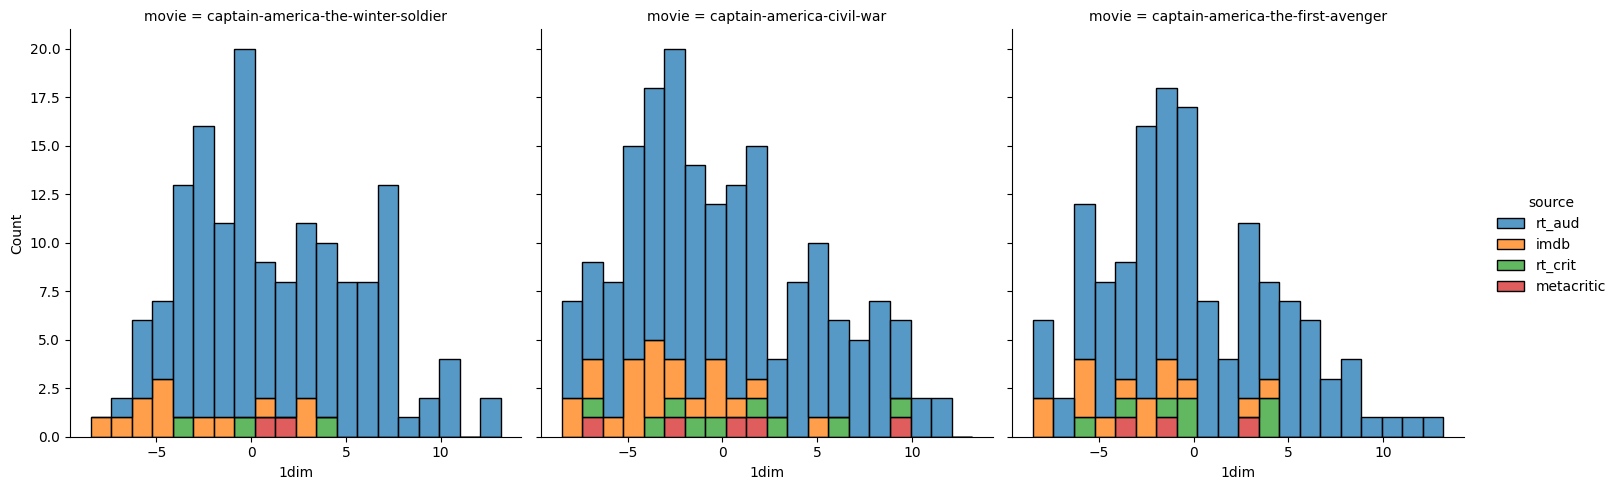

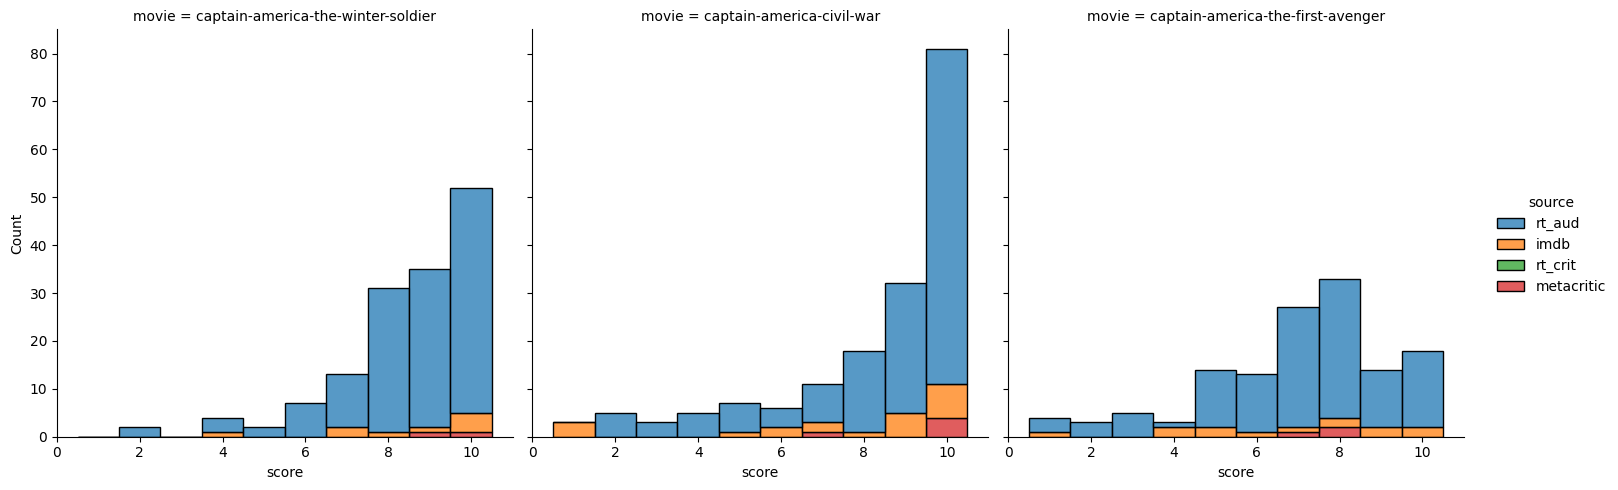

In [ ]:
def plot_embeds(franchise, df):
    cap = df[df['movie'].str.startswith(franchise)]
    sns.displot(data= cap, x='1dim', col='movie',bins=20, fill=True, discrete=False, hue='source', multiple = 'stack')

plot_embeds('captain-america', sample_data)
map_franchise('captain-america', sample_data)

# plot_embeds('thor', sample_data)
# map_franchise('thor', sample_data)

# plot_embeds('eternals', sample_data)
# map_franchise('eternals', sample_data)